In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("spam.csv", encoding='latin-1')
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
4  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
X = data['v1']
y = data['v2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

ml_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(ml_accuracy * 100))

Accuracy: 0.54%


In [4]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

y_pred = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(lr_accuracy * 100))

Accuracy: 0.54%


In [5]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


y_pred = dt_classifier.predict(X_test)


dt_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(dt_accuracy * 100))

Accuracy: 0.54%


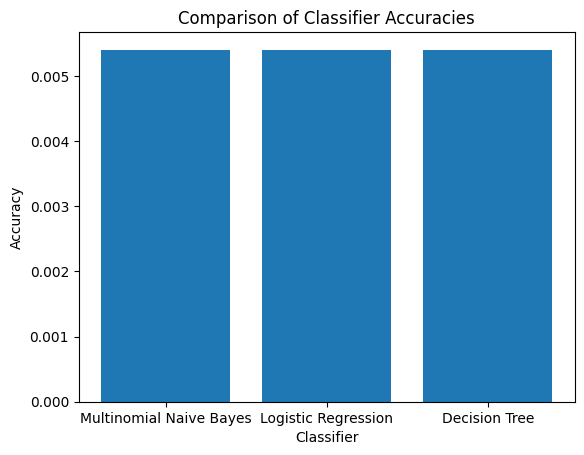

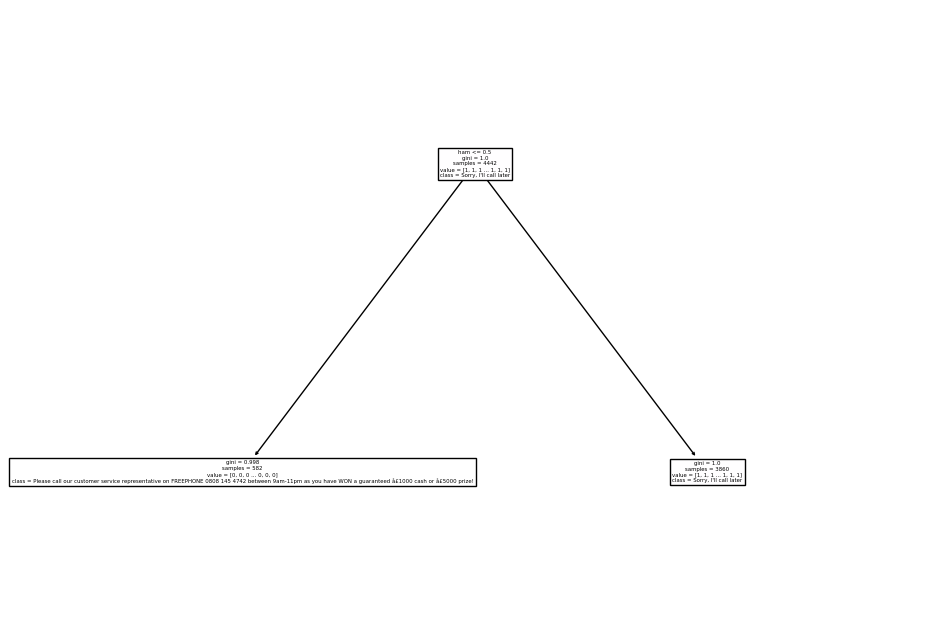

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifiers = ['Multinomial Naive Bayes', 'Logistic Regression', 'Decision Tree']
accuracies = [ml_accuracy, lr_accuracy, dt_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=vectorizer.get_feature_names_out(), class_names=dt_classifier.classes_, filled=True)
plt.show()